In [1]:
using ReinforcementLearningAnIntroduction

┌ Info: Precompiling ReinforcementLearningAnIntroduction [02c1da58-b9a1-11e8-0212-f9611b8fe936]
└ @ Base loading.jl:1260
┌ Info: Skipping precompilation since __precompile__(false). Importing ReinforcementLearningAnIntroduction [02c1da58-b9a1-11e8-0212-f9611b8fe936].
└ @ Base loading.jl:1033
┌ Warning: Incompatibility detected between CUDA and LLVM 8.0+; disabling debug info emission for CUDA kernels
└ @ CUDAnative /home/tj/.julia/packages/CUDAnative/hfulr/src/CUDAnative.jl:114


In [2]:
using Plots

In [3]:
env = AccessControlEnv()
nstates = length(get_observation_space(env))
nactions = length(get_action_space(env))
agent = Agent(
    policy=QBasedPolicy(
        learner=DifferentialTDLearner(
            approximator=TabularApproximator(n_state=nstates, n_action=nactions),
            α=0.01,
            β=0.01,
        ),
        explorer=EpsilonGreedyExplorer(0.1)
    ),
    trajectory=EpisodicCompactSARTSATrajectory()
)

Agent{QBasedPolicy{DifferentialTDLearner{TabularApproximator{2,Array{Float64,2}}},EpsilonGreedyExplorer{:linear,false,Random.MersenneTwister}},EpisodicCompactSARTSATrajectory{Tuple{Int64,Int64,Float32,Bool,Int64,Int64},Tuple{Array{Float32,1},Array{Bool,1},Array{Int64,1},Array{Int64,1}}},Symbol}(QBasedPolicy{DifferentialTDLearner{TabularApproximator{2,Array{Float64,2}}},EpsilonGreedyExplorer{:linear,false,Random.MersenneTwister}}(DifferentialTDLearner{TabularApproximator{2,Array{Float64,2}}}(TabularApproximator{2,Array{Float64,2}}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]), 0.01, 0.01, 0.0, 0), EpsilonGreedyExplorer{:linear,false,Random.MersenneTwister}(0.1, 1.0, 0, 0, 1, Random.MersenneTwister(UInt32[0xe7f55b25, 0x49a285fd, 0x5a707e1a, 0x3cc5f66a], Random.DSFMT.DSFMT_state(Int32[1714003349, 1073152620, 1902252378, 1072882536, -106534651, 1073155979, -659569969, 1072821120, 814770951, 1072985881  …  -81713210, 1073641193, 132587546, 1073250029, -1521963263, 459665426, 2104153527, 397618036

In [4]:
run(agent, env, StopAfterStep(2*10^6; is_show_progress=false))

EmptyHook()

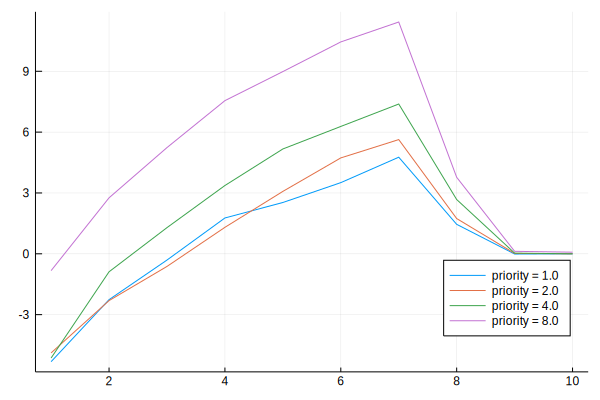

In [5]:
p = plot(legend=:bottomright)
for i in 1:length(AccessControl.PRIORITIES)
    plot!(
        [agent.policy.learner.approximator(AccessControl.TRANSFORMER[(CartesianIndex(n+1, i))]) |> maximum
            for n in 1:AccessControl.N_SERVERS],
        label="priority = $(AccessControl.PRIORITIES[i])")
end
p